In [ ]:
import matplotlib.pyplot as plt
import json

In [ ]:
rand_results = []
results = []

with open("results_rand.json", "r") as f:
    rand_results = json.load(f)

with open("results.json", "r") as f:
    results = json.load(f)

In [ ]:
sorted_results = {}
for r in results:
    if r["cleaner_count"] in sorted_results:
        sorted_results[r["cleaner_count"]].append(r)

    else :
        sorted_results[r["cleaner_count"]] = [r]

sorted_rand_results = {}
for r in rand_results:
    if r["cleaner_count"] in sorted_rand_results:
        sorted_rand_results[r["cleaner_count"]].append(r)

    else :
        sorted_rand_results[r["cleaner_count"]] = [r]

sorted_rand_results

In [ ]:
def get_data(data):
    step = []
    avg_picked = []
    max_picked = []
    min_picked = []
    avg_steps_trash = []
    rem_trash = []

    keys = list(data.keys())
    keys.sort()
    for k in keys:
        step_accum = 0
        avg_picked_accum = 0
        max_picked_accum = 0
        min_picked_accum = 0
        avg_steps_trash_accum = 0
        rem_trash_accum = 0

        for r in data[k]:
            step_accum += r["current step"]
            avg_picked_accum += r["avg trash picked"]
            max_picked_accum += r["max trash picked"]
            min_picked_accum += r["min trash picked"]
            avg_steps_trash_accum += r["avg steps to trash"]
            rem_trash_accum += r["remaining trash"]

        r_count = len(sorted_results[k])
        step.append(step_accum / r_count)
        avg_picked.append(avg_picked_accum / r_count)
        max_picked.append(max_picked_accum / r_count)
        min_picked.append(min_picked_accum / r_count)
        avg_steps_trash.append(avg_steps_trash_accum / r_count)
        rem_trash.append(rem_trash_accum / r_count)

    return {
        "x": keys,
        "step": step,
        "avg_picked": avg_picked,
        "max_picked": max_picked,
        "min_picked": min_picked,
        "avg_steps_trash": avg_steps_trash,
        "rem_trash": rem_trash
    }

In [46]:
data = get_data(sorted_results)
rand_data = get_data(sorted_rand_results)

def graph(x, y1, y2, title, xlabel, ylabel):
    plt.figure()
    plt.plot(x, y1, linewidth=1, color="blue", label="Simulación con agentes en (1, 1)")
    plt.plot(x, y2, linewidth=1, color="red", label="Simulación con agentes en posiciónes aleatorias")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()




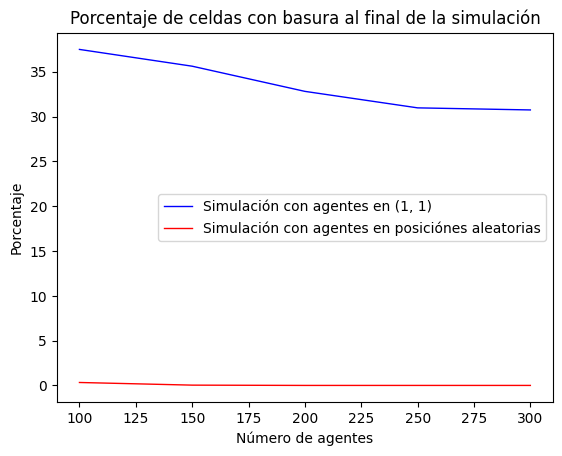

In [47]:
graph(data["x"], data["rem_trash"], rand_data["rem_trash"], "Porcentaje de celdas con basura al final de la simulación", "Número de agentes", "Porcentaje")

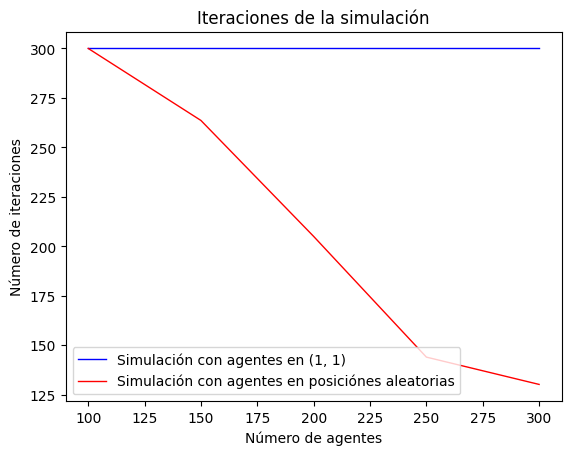

In [48]:
graph(data["x"], data["step"], rand_data["step"], "Iteraciones de la simulación", "Número de agentes", "Número de iteraciones")

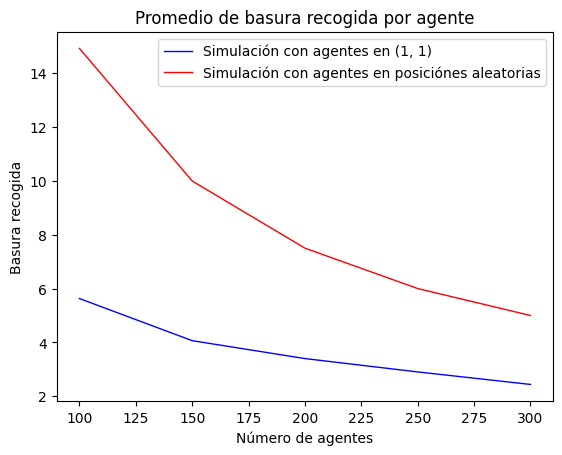

In [49]:
graph(data["x"], data["avg_picked"], rand_data["avg_picked"], "Promedio de basura recogida por agente", "Número de agentes", "Basura recogida")

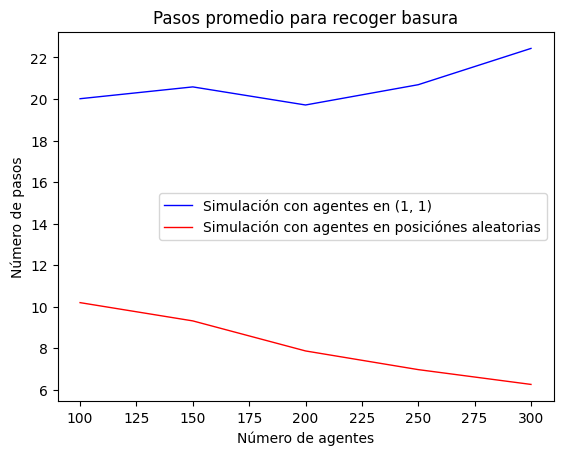

In [50]:
graph(data["x"], data["avg_steps_trash"], rand_data["avg_steps_trash"], "Pasos promedio para recoger basura", "Número de agentes", "Número de pasos")